- competition/dataset : [https://www.kaggle.com/c/home-credit-default-risk/data](https://www.kaggle.com/c/home-credit-default-risk/data)
- date : 2021/01/29
- original : [https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction](https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction)

## Start Here: A Gentle Introduction

**✏ 필사 1회** 

### Introduction: Home Credit Default Risk Competiton

이 노트북은 머신러닝 대회가 처음이거나 문제에 대한 부드러운 소개를 원하는 사람들을 위한 것입니다. 머신러닝을 시작하기 위한 기본을 보여주기 위해 일부러 복잡한 모델을 만들거나 많은 양의 데이터를 결합하는 것은 피합니다.  

여기서는 Kaggle에 게시된 Home Credit default risk 머신러닝 대회를 처음 살펴볼 것입니다. 이 대회의 목적은 과거의 대출 신청 데이터를 사용하여 신청자가 대출금을 상환할 수 있을지를 예측하는 것입니다. 이것은 전형적인 지도학습 분류 과제입니다.  

* **Supervised**: 라벨이 트레이닝 데이터에 포함되어 있고, 목표는 모델을 학습하여 feature들로부터 라벨을 예측하는 것입니다.  
* **Classification**: 라벨은 0(즉시 대출), 1(재대출 어려움)로 이루어진 이진 변수입니다.

## Data
데이터는 계좌가 없는 사람들에게 제공되는 신용(대출) 전용 서비스인 [Home Credit](https://www.homecredit.net/about-us.aspx)에서 제공합니다. 고객이 대출금을 상환할지 혹은 어려울지 예측하는 것은 중요한 비즈니스 요구 사항이며, Home Credit은 머신러닝 커뮤니티가 이 과제에서 그들을 돕기 위해 어떤 종류의 모델을 개발할 수 있는지 알아보기 위해 Kaggle에 대회를 개최합니다.  

7가지 종류의 데이터가 있습니다:  
* application_train/application_test  
Home Credit 대출 신청자들에 대한 정보가 담긴 주된 데이터.  
모든 대출자에게는 자체 행이 있으며, ```SK_ID_CURR``` 변수로 식별 가능합니다. 트레이닝 데이터에는 0(상환됨), 1(상환되지 않음)을 나타내는 ```TARGET```이 있습니다.  
* bureau  
다른 금융기관에서 받은 고객의 이전 신용에 관한 데이터.  
각각의 과거 신용은 bureau에 자체 행이 있지만 application data에 있는 하나의 대출은 여러 개의 이전 신용기록을 가질 수 있습니다.  
* bureau_balance  
bureau의 이전 신용기록에 대한 월별 데이터.  
각각의 행은 한달 동안의 이전 이력이며, 하나의 이전 신용이력은 각 월에 하나씩 여러 행을 가질 수 있습니다.  
* previous_application  
application 데이터에 있는 대출 신청 고객의 Home Credit 대출 신청 이력.  
application 데이터의 현재 신청자들은 각각 여러 개의 이력을 가질 수 있습니다. 과거의 신청 이력은 각각 하나의 행이며, ```SK_ID_PREV``` 변수를 통해 알 수 있습니다.
* POS_CASH_BALANCE  
과거의 판매 시점이나 고객이 Home Credit에 의해 가지고 있는 현금 대출에 대한 월별 데이터.  
각 행은 한달이며, 하나의 이전 대출은 여러 개의 행을 가질 수 있습니다.  
* installments_payment  
Home Credit에서의 이전 대출에 대한 결제 이력.  
각 결제마다 하나의 행이며, 누락된 결제에 대한 행도 있습니다.  

다음 그림은 데이터가 어떻게 연관되어 있는지를 나타냅니다.

![diagram](data/home_credit.png)  

모든 컬럼에 대한 정의서(```HomeCredit_columns_description.csv```)와 예상 제출 파일의 예시에 대한 데이터도 있습니다.

## Metric: ROC AUC
데이터에 대해 이해한 후, 우리의 제출물을 평가하는 메트릭에 대해 이해해야 합니다.이 경우에는 [Receiver Operating Characteristic Area Under the Curve (ROC AUC, AUROC)](https://stats.stackexchange.com/questions/132777/what-does-auc-stand-for-and-what-is-it)로 알려진 보편적인 분류 메트릭입니다.  

ROC AUC는 어려워 보이지만, 두 가지의 개념만 머리에 입력하면 상대적으로 어렵지 않습니다. Receiver Operating Characteristic (ROC) 곡선은 positive의 비율 대 반대의 비율을 그래프로 나타냅니다.  

![ROC](data/ROC-curve.png)  

그래프의 한 선은 단일 모델의 곡선을 나타내며, 곡선을 따라 이동하는 것은 positive 인스턴스를 분류하는데 사용된 임계값이 변화하는 것을 나타냅니다. 임계값은 오른쪽 상단에서 0으로 시작하여 왼쪽 하단의 1로 향합니다. 곡선이 왼쪽 위에 있을수록 더 좋은 모델임을 의미합니다. 예를 들어, 파란색 모델은 빨간색 모델보다 좋으며, 검은색 대각선은 날 것의 무작위 추측 모델을 나타냅니다.  

Area Under the Curve (AUC)는 이름 그대로 ROC 곡선 아래 영역(곡선의 적분)을 의미합니다.  이 메트릭은 0에서 1 사이이며 나은 모델일수록 점수가 높습니다. 단순히 무작위로 맞추는 모델은 ROC AUC가 0.5일 것입니다.  

ROC AUC에 따라 분류기를 측정할 때, 0이나 1에 대한 예측을 생성하는 것이 아니라 0과 1 사이의 확률을 생성합니다. 우리는 주로 정확도 측면에서 생각하기를 좋아하기 때문에 혼란스러울 수 있으나, 우리가 불균형한 클래스로 문제가 생겼을 때 정확도는 최상의 메트릭이 아닙니다. 예를 들어, 99.9999%의 정확도를 가진 테러리스트 탐지 모델을 만들고자 할 때, 단순히 모든 사람이 테러리스트가 아니라고 하는 모델을 만든다고 가정합니다. 분명히 그것은 효과가 없을 것이며(재현율 = 0), 분류기의 성능을 정확하게 반영하기 위해 ROC AUC나 F1 score와 같은 고급 메트릭들을 사용합니다. ROC AUC가 큰 모델은 정확도 또한 높을 것이지만, ROC AUC는 모델의 성능을 더 잘 표현합니다.  

우리가 사용할 데이터의 배경과 최대화를 위한 메트릭을 알고 있다면, 이제 데이터 탐색을 해보겠습니다. 앞에서 말했듯이, 우리는 앞으로의 작업에서 메인 데이터와 우리가 구축할 수 있는 단순한 모델만을 고수할 것입니다.  

**참고한 커널들**:
* [Manual Feature Engineering Part One](https://www.kaggle.com/willkoehrsen/introduction-to-manual-feature-engineering)
* [Manual Feature Engineering Part Two](https://www.kaggle.com/willkoehrsen/introduction-to-manual-feature-engineering-p2)
* [Introduction to Automated Feature Engineering](https://www.kaggle.com/willkoehrsen/automated-feature-engineering-basics)
* [Advanced Automated Feature Engineering](https://www.kaggle.com/willkoehrsen/tuning-automated-feature-engineering-exploratory)
* [Feature Selection](https://www.kaggle.com/willkoehrsen/introduction-to-feature-selection)
* [Intro to Model Tuning: Grid and Random Search](https://www.kaggle.com/willkoehrsen/intro-to-model-tuning-grid-and-random-search)
* [Automated Model Tuning](https://www.kaggle.com/willkoehrsen/automated-model-tuning)
* [Model Tuning Results](https://www.kaggle.com/willkoehrsen/model-tuning-results-random-vs-bayesian-opt/notebook)

## Imports
전형적인 데이터 사이언스 스택을 사용합니다: ```numpy```, ```pandas```, ```sklearn```, ```matplotlib```

In [174]:
# 데이터 조작
import numpy as np
import pandas as pd

# 범주형 변수 다루기
from sklearn.preprocessing import LabelEncoder

# 파일 시스템 관리
import os

# 경고 숨기기
import warnings
warnings.filterwarnings('ignore')

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

## Read in Data
먼저, 사용가능한 모든 데이터 파일을 나열할 수 있습니다. 트레이닝을 위한 주 데이터 1개, 테스트를 위한 주 데이터 1개, 제출 예시 파일 1개, 각 대출자들에 대한 부가적인 정보가 들어있는 기타 파일 6개, 총 9개의 파일이 있습니다. 

In [175]:
# 사용 가능한 파일 리스트
print(os.listdir('data/'))

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'home_credit.png', 'label_encoding.png', 'one_hot_encoding.png', 'ROC-curve.png', 'submission_1_log_reg_baseline.csv', 'submission_1_random_forest_baseline.csv', 'submission_1_random_forest_baseline_domain.csv', 'submission_1_random_forest_baseline_engineered.csv']


In [176]:
# 트레이닝 데이터
app_train = pd.read_csv('data/application_train.csv')
print('Training data shape:', app_train.shape)
app_train.head()

Training data shape: (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


트레이닝 데이터에는 307,511개의 데이터와 ```TARGET```을 포함한 122개의 변수가 있습니다.

In [177]:
# 테스트 데이터
app_test = pd.read_csv('data/application_test.csv')
print('Testing data shape:', app_test.shape)
app_test.head()

Testing data shape: (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


테스트 셋은 상당히 작으며 ```TARGET``` 컬럼이 없습니다.

## Exploratory Data Analysis
탐색적 데이터 분석(EDA)은 통계량을 계산하고 수치를 만들어 데이터 내의 트렌드, 이상치, 패턴, 관계 등을 찾는 개방형 프로세스입니다. EDA의 목표는 데이터가 우리에게 알려줄 수 있는 것들을 익히는 것입니다.일반적으로 높은 수준의 관점에서 시작하여 데이터의 흥미로운 부분을 찾아 특정 영역으로 좁혀 들어갑니다. 그러한 발견은 그 자체로 흥미로울 수 있으며, 어떤 변수들을 사용할지 결정하는 것을 도움으로써 모델 선택에 도움을 주는데 사용할 수 있습니다.

### Examin the Distribution of Target Column
목표는 대출이 제때 상환되었으면 0, 상환에 어려움이 있는 고객은 1로 예측하는 것입니다. 우리는 먼저 각 범주에 속하는 대출 건수를 확인할 수 있습니다.

In [178]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

<AxesSubplot:ylabel='Frequency'>

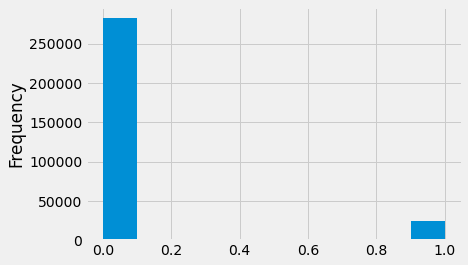

In [179]:
app_train['TARGET'].astype(int).plot.hist()

여기에서 우리는 [불균형한 클래스의 문제](http://www.chioka.in/class-imbalance-problem/)를 발견할 수 있습니다. 상환하지 못한 대출보다 제때 상환한 대출이 훨씬 많습니다. 일단 더 정교한 머신러닝 모델에 들어가면, 이러한 불균형을 반영하기 위해 데이터의 표현에 따라 클래스에 가중치를 부여할 수 있습니다.

### Examine Missing Values
이제 각 컬럼의 결측값 수와 비율을 살펴봅시다.

In [180]:
# 컬럼별 결측값을 계산하기 위한 함수
def missing_values_table(df):
    # 전체 결측값
    mis_val = df.isnull().sum()
    
    # 결측값의 비율
    mis_val_percent = 100 * df.isnull().sum()/len(df)
    
    # 결과에 대한 테이블 생성
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # 컬럼명 변경
    mis_val_table_ren_columns = mis_val_table.rename(columns={0:'Missing Values', 1:'% of Total Values'})
    
    # 결측값 비율에 대해 내림차순 정렬
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values('% of Total Values', ascending=False).round(1)
    
    # 요약 정보 출력
    print('Your selected dataframe has ' + str(df.shape[1]) + ' columns.\nThere are ' + str(mis_val_table_ren_columns.shape[0]) + ' columns that have missing values.')
    
    # 결측값 정보 테이블 리턴
    return mis_val_table_ren_columns

In [181]:
# 결측값 통계량
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


머신러닝 모델을 만들 때가 되면, 이 결측값들을 채워야 합니다(=imputation). 이후 작업에서 우리는 [imputation 없이도 결측값을 다룰 수 있는](https://stats.stackexchange.com/questions/235489/xgboost-can-handle-missing-data-in-the-forecasting-phase) XGBoost와 같은 모델을 사용할 것입니다. 또다른 방법은 결측값의 비율이 매우 큰 컬럼을 제거하는 것인데, 이러한 컬럼들이 우리의 모델에 도움이 되는지 미리 알 수가 없습니다. 따라서 현재는 모든 컬럼을 유지하겠습니다.

### Column Types
컬럼들이 데이터 타입을 살펴봅시다. ```int64```와 ```float64```는 숫자형 변수(이산형 혹은 연속형)이고, ```object``` 컬럼들은 문자열을 포함하며 범주형 변수입니다.

In [182]:
# 각 타입별 컬럼 수 확인
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

```object```(범주형) 컬럼들 각각의 범주 개수를 살펴봅시다.

In [183]:
app_train.select_dtypes('object').apply(pd.Series.nunique, axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

대부분의 범주형 변수는 고유한 항목의 수가 상대적으로 적습니다. 이러한 범주형 변수들을 다룰 방법을 찾아야합니다.

### Encoding Categorical Variables
더 진행하기 전에, 성가신 범주형 변수들을 처리해야 합니다. 불행히도 머신러닝 모델은 범주형 변수를 다룰 수 없습니다([LightGBM](https://lightgbm.readthedocs.io/en/latest/Features.html)과 같은 모델은 예외). 따라서 모델에 반영하기 전에 이러한 변수들을 숫자로 변환할 방법을 찾아야 합니다. 이러한 방법은 크게 두 가지가 있습니다.  

* Label encoding  
범주형 변수의 각각의 고유한 항목들을 숫자에 할당합니다. 새로운 컬럼이 생성되지 않습니다.  
![LabelEncoding](data/label_encoding.png)  

* One-hot encoding  
범주형 변수의 각 범주마다 새로운 컬럼을 생성합니다. 각 관측치는 해당 범주에 대한 컬럼에는 1을, 나머지 새로운 컬럼들에는 0을 입력합니다.  
![OneHotEncoding](data/one_hot_encoding.png)  

레이블인코딩의 문제점은 범주들에 임의로 순서를 준다는 점입니다. 그 값은 각 범주들에 무작위로 할당되고, 그 범주에 고유한 측면을 전혀 반영하지 못합니다. 위의 예제에서 programmer는 4를 받고, data scientist는 1을 받았지만, 다시 해당 과정을 수행하면 라벨은 바뀌거나 전혀 달라집니다. 정수의 실제 할당은 임의적입니다. 따라서 레이블인코딩을 수행할 때, 모델은 해당 컬럼의 상대적인 값을 사용하여 우리가 원치 않는 가중치를 할당할 수도 있습니다. 만약 범주형 변수에 고유한 값이 두개라면 레이블인코딩이 괜찮지만, 2개보다 많을 때는 원핫인코딩이 더 안전한 방법입니다.  

이러한 접근 방식의 상대적 장점에 대해 약간의 논쟁이 있으며, 어떤 모델은 레이블인코딩된 범주형 변수를 사용해도 아무 문제가 없습니다. 여기에 좋은 [Stack Overflow](https://datascience.stackexchange.com/questions/9443/when-to-use-one-hot-encoding-vs-labelencoder-vs-dictvectorizor) 토론이 있습니다. 개인적인 생각으로는 클래스가 많은 범주형 변수에 대해서는 범주에 임의로 값을 부여하지 않는다는 점에서 원핫인코딩이 가장 안전합니다. 원핫인코딩의 한 가지 안 좋은 점은 범주형 변수가 많은 범주를 가질 때 변수의 수(데이터의 차원)가 폭발한다는 것입니다. 이것을 다루기 위해, 우리는 차원의 수를 줄이기 위해 [PCA](http://www.cs.otago.ac.nz/cosc453/student_tutorials/principal_components.pdf)나 [다른 차원 축소 방법](https://www.analyticsvidhya.com/blog/2015/07/dimension-reduction-methods/)을 진행한 후에 원핫인코딩을 수행할 수 있습니다.  

우리는 두 개의 범주를 가진 범주형 변수에는 레이블인코딩을 사용하고, 2개보다 많은 범주를 가진 변수에 대해서는 원핫인코딩을 사용할 것입니다. 이 과정은 프로젝트에 더 깊게 들어가면 바꿔야 할 수도 있지만, 지금은 이것이 주는 영향을 확인해볼 수 있습니다. (또한 이 노트북에서는 차원 축소를 진행하지 않을 것입니다.)

#### Label Encoding and One-Hot Encoding
위에서 설명했던 방식을 구현해봅시다. 두 개의 고유한 범주를 갖는 범주형 변수들은 모두 레이블인코딩을, 두개 넘는 변수들은 원핫인코딩을 사용할 것입니다.  

레이블인코딩은 Scikit-Learn의 ```LabelEncoder```를, 원핫인코딩은 Pandas의 ```get_dummies```를 사용하겠습니다.

In [184]:
# 레이블인코딩
# 레이블인코더 객체 생성
le = LabelEncoder()
le_count = 0

# 컬럼마다 반복
for col in app_train:
    if app_train[col].dtype == 'object':
        if len(app_train[col].unique()) <= 2:
            # 트레이닝 데이터 학습
            le.fit(app_train[col])
            # 트레이닝 데이터와 테스트 데이터 변환
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # 몇 개의 컬럼이 라벨인코딩되었는지 추적
            le_count += 1

print('%d columns were label encoded'%le_count)

3 columns were label encoded


In [185]:
# 원핫인코딩
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Feature shape:', app_train.shape)
print('Testing Feature shape:', app_test.shape)

Training Feature shape: (307511, 243)
Testing Feature shape: (48744, 239)


#### Aligning Training and Testing Data
트레이닝 데이터와 테스트 데이터에는 모두 같은 컬럼들이 있어야 합니다. 원핫인코딩은 테스트 데이터에 나타나지 않은 범주들을 가진 범주형 변수들 때문에 트레이닝 데이터에는 더 많은 변수들이 있습니다. 테스트 데이터에 없는 컬럼들을 트레이닝 데이터에서 지우기 위해서는 데이터 정렬이 필요합니다. 먼저, 타겟 컬럼을 추출하고(테스트 데이터에는 없으나 해당 정보를 가지고 있어야 하기 때문), ```axis=1```를 설정하여 행이 아닌 열을 정렬합니다.

In [186]:
train_labels = app_train['TARGET']

# 양쪽에 존재하는 컬럼만 유지하며 정렬
app_train, app_test = app_train.align(app_test, join='inner', axis=1)

# 타겟 데이터 다시 추가
app_train['TARGET'] = train_labels

print('Training Feature shape:', app_train.shape)
print('Testing Feature shape:', app_test.shape)

Training Feature shape: (307511, 240)
Testing Feature shape: (48744, 239)


 트레이닝 셋과 테스트 셋은 이제 동일한 컬럼 수를 가지며, 이것은 머신러닝에 요구되는 사항입니다. 컬럼이 수는 원핫인코딩 때문에 매우 늘어났습니다. 어느 순간에 아마도 우리는 데이터 셋의 크기를 줄이기 위해 [차원 축소](https://en.wikipedia.org/wiki/Dimensionality_reduction)를 원하게 될 것입니다.

### Back to Exploratory Data Analysis

#### Anomalies
EDA를 할 때 우리가 항상 경계하고 싶은 한 가지 문제점은 데이터 내의 이상값입니다. 이것은 잘못 입력된 수, 측정 장비의 오류, 혹은 유효하지만 극단적인 값 때문일 것입니다. 이상값들을 정량적으로 확인하는 방법은 ```describe``` 메소드를 사용하여 컬럼의 통계량을 확인하는 것입니다. ```DAYS_BIRTH``` 컬럼의 수는 현재 대출 신청과 대하여 기록되므로 음수 값입니다. 연도별로 통계를 보기 위해 -1을 곱하고, 날짜 수로 나눌 수 있습니다.

In [187]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

나이대는 합리적인 것 같아 보입니다. 높거나 낮은 이상값은 보이지 않습니다. 근로일수는 어떨까요?

In [188]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

이것은 괜찮지 않아 보입니다. 최댓값은 약 1000년입니다.

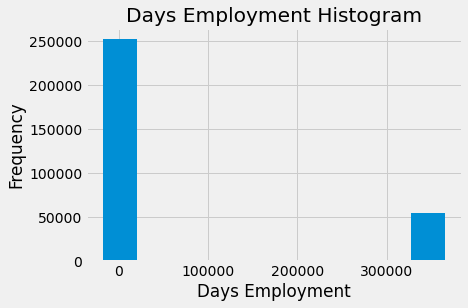

In [189]:
app_train['DAYS_EMPLOYED'].plot.hist(title='Days Employment Histogram')
plt.xlabel('Days Employment')
plt.show()

궁금하니 이상값을 가진 고객을 세분화하여 다른 고객들에 비해 채무불이행 비율이 높은지 낮은지 알아봅시다.

In [190]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %.2f%% of loans'%(100*non_anom['TARGET'].mean()))
print('The anomalies default on %.2f%% of loans'%(100*anom['TARGET'].mean()))
print('There are %d anomalous days of employment'%len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


매우 흥미롭게도 이상값의 채무불이행률이 더 낮게 나왔습니다.  

이상값을 처리하는 것은 규칙이 설정되지 않은 정확한 상황에 따라 달라집니다. 가장 안전한 방법중 하나는 이상값을 결측값으로 처리하고 머신러닝 전에 Imputation을 사용하여 채우는 것입니다. 이 경우에는 모든 이상값이 동일한 값을 갖기 때문에 모든 대출이 공통점을 공유하는 경우에 대비하여 같은 값으로 채우고자 합니다. 이상값이 중요한 것 같아 보이기 때문에 우리는 이상값을 ```np.nan```으로 채우고 이상값인지 아닌지 나타내는 boolean형 컬럼을 만들 것입니다.

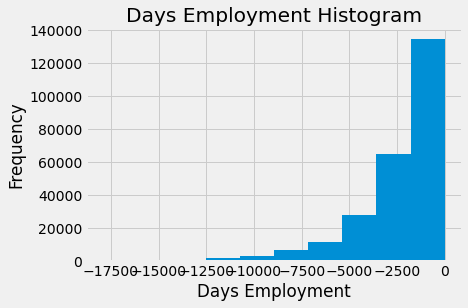

In [191]:
### 이상값에 대한 flag 컬럼 생성
app_train['DAYS_EMPLOYED_ANOM'] = app_train['DAYS_EMPLOYED'] == 365243

# 이상값을 nan으로 대체
app_train['DAYS_EMPLOYED'].replace({365243:np.nan}, inplace=True)

app_train['DAYS_EMPLOYED'].plot.hist(title='Days Employment Histogram')
plt.xlabel('Days Employment')
plt.show()

분포가 우리가 생각했던 것과 매우 일치하는 것으로 보이며, 이 값들이 원래 이상값이라는 것을 모델에게 알리기 위해 새로운 컬럼을 만들었습니다(nan값은 중앙값과 같은 값으로 채워야 하기 때문). ```DAYS```와 관련된 다른 컬럼들은 확실한 이상값은 없는 것 같아 보입니다.  

여기서 매우 중요한 것은, 무엇이는 트레이닝 데이터에 한 것은 테스트 데이터에도 적용해야 한다는 점입니다. 테스트 셋에도 새로운 컬럼을 만들고 기존 컬럼에 ```np.nan```을 채우도록 하겠습니다.

In [192]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test['DAYS_EMPLOYED'] == 365243
app_test['DAYS_EMPLOYED'].replace({365243:np.nan}, inplace=True)

print('There are %d anomalies in the test data out of %d entries'%(app_test['DAYS_EMPLOYED_ANOM'].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


#### Correlations
이제 범주형 변수와 이상값을 처리했으므로, EDA를 계속 진행하겠습니다. 데이터를 이해하고 다룰 방법은 변수들과 타겟 간의 상관관계를 살펴보는 것입니다. ```.corr``` 메소드를 사용하여 모든 변수들과 타겟 사이의 피어슨 상관관계를 계산할 수 있습니다.  

상관계수는 변수의 관련성을 나타내는 가장 좋은 방법은 아니지만 데이터 내에서 가능한 관계에 대한 아이디어를 줍니다. 상관계수의 절댓값에 대한 일반적인 해석은 다음과 같습니다.  

* .00-.19: 매우 약함
* .20-.39: 약함
* .40-.59: 보통
* .60-.79: 강함
* .80-1.0: 매우 강함

In [193]:
# 타겟변수에 대한 상관관계 파악
correlations = app_train.corr()['TARGET'].sort_values()

# 상관관계 확인
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negetive Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negeti

더 중요한 상관관계들을 다뤄봅시다. ```DAYS_BIRTH```는 가장 강한 상관관계입니다. 문서를 살펴보면, ```DAYS_BIRTH```는 음수로 대출 시점에 고객의 나이를 일수로 계산한 컬럼입니다. 상관관계는 양수이지만 해당 컬럼의 값이 실제로 음수이기 때문에 고객의 나이가 많을수록 채무불이행(target == 0)이 발생할 가능성이 적다는 것을 의미합니다. 약간 혼란스럽기 때문에 변수에 절댓값을 취할 것이고, 아마 상관관계는 음의 상관관계가 될 것입니다.

#### Effect of Age on Repayment

In [194]:
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982712

고객의 연령이 높을수록 target과 음의 선형 상관관계를 가진다는 것은 나이가 많을수록 제때에 대출금을 상환하려는 경향이 있다는 것을 의미합니다.  

이 변수를 제대로 살펴봅시다. 먼저, 나이에 대한 히스토그램을 작성할 수 있습니다. x축에 년을 넣어 조금 더 이해가 잘 되도록 시각화하겠습니다.

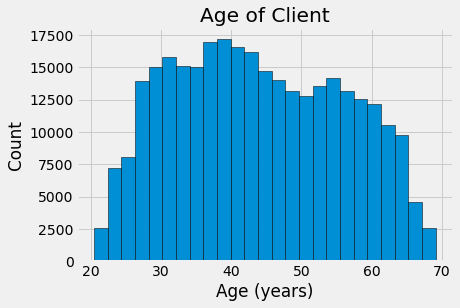

In [195]:
# 플롯의 스타일 설정
plt.style.use('fivethirtyeight')

# 연령별 분포 시각화
plt.hist(app_train['DAYS_BIRTH']/365, edgecolor='k', bins=25)
plt.title('Age of Client')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

나이의 분포는 모든 연령들이 합리적이기 때문에 이상값이 없다는 것 외에는 그다지 많은 것을 알려주지 않습니다. target에 대한 나이의 효과를 시각화하기 위해, target 값마다 다른 색상을 준 커널 밀도 추정 플롯(KDE)을 만들 것입니다. 커널 밀도 추청 플롯은 단일 변수의 분포를 보여주며 평활화된 히스토그램으로 생각할 수 있습니다. (단일 평활 곡선 개발을 위해 각 데이터의 지점과 그것들을 평균화한 값을 사용하여 커널을 생성합니다.) seaborn의 ```kdeplot```을 사용하여 만들어보겠습니다.

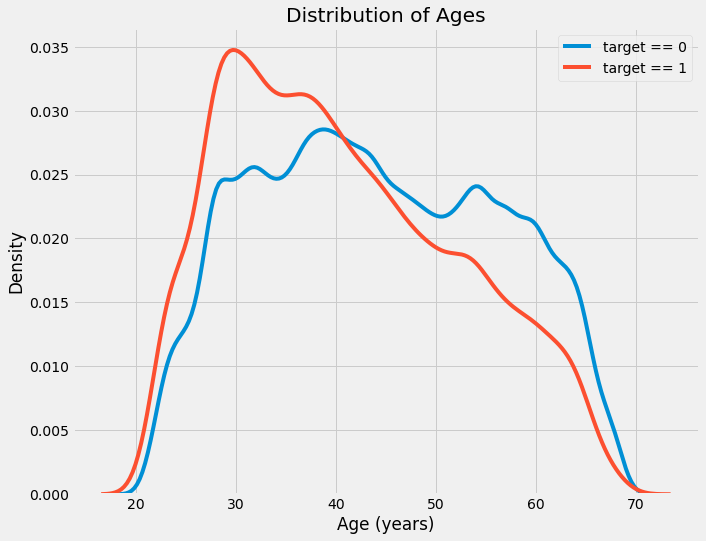

In [196]:
plt.figure(figsize=(10, 8))

# 제때 상환한 대출들에 대한 KDE 플롯
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH']/365, label='target == 0')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH']/365, label='target == 1')

# 레이블 추가
plt.legend(loc='best')
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Distribution of Ages')
plt.show()

target == 1인 곡선은 나이가 어린 쪽을 향해 기울어집니다. 유의한 상관관계는 아니더라도(-0.07) 이 변수는 타겟에 영향을 주기 때문에 머신러닝 모델에 유용할 것으로 보입니다. 이 관계를 다른 방법으로 알아봅시다. (연령대별 대출 상환의 평균 실패)  

이 그래프를 만들기 위해 먼저 ```cut```을 사용하여 나이 범주를 5개 년씩 잘라야 합니다. 그 다음, 각 범주마다 타겟에 대한 평균값을 계산하여 대출을 상환하지 않은 비율을 알아봅니다.

In [197]:
# 나이 정보를 분리된 데이터프레임에 저장
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH']/365

# 나이 데이터 구간화
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins=np.linspace(20, 70, num=11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [198]:
# 구간별로 그룹화 후 평균 계산
age_groups = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


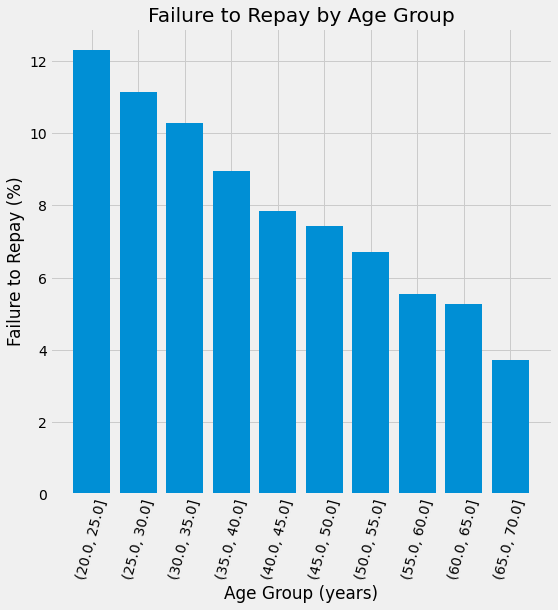

In [199]:
plt.figure(figsize=(8, 8))

# 나이 구간과 타겟의 평균값을 bar plot으로 시각화
plt.bar(age_groups.index.astype(str), 100*age_groups['TARGET'])

# 라벨링
plt.xticks(rotation=75)
plt.xlabel('Age Group (years)')
plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group')
plt.show()

확실한 추세가 있습니다. 젊은 신청자일수록 대출을 잘 갚지 않는 것 같습니다! 상환 실패율은 가장 어린 세 그룹의 경우 10%를 넘고, 가장 높은 연령대는 5%를 넘지 않습니다.  

이것은 은행에서 직접 사용할 수 있는 정보입니다. 젊은 고객들은 대출금을 상환할 가능성이 낮기 때문에 그들에게 더 많은 지침이나 재정 계획 팁을 제공해야 할 수도 있습니다. 이것은 은행이 젊은 연령의 고객들을 차별해야 한다는 것이 아니라 해당 고객들이 제때 상환할 수 있도록 예방 조치를 취하는 것이 현명하다는 것을 의미합니다.

#### Exterior Sources
target과 가장 강한 음의 상관관계를 가지는 세 개의 변수는 ```EXT_SOURCE_1```, ```EXT_SOURCE_2```, ```EXT_SOURCE_3```입니다. 문서에 따르면, 이 변수들은 '외부 데이터 소스로부터 정규화된 수치'를 나타냅니다. 정확히 무슨 의미인지는 모르겠지만, 수많은 데이터 소스를 이용하여 만들어진 누적 신용 등급일 수 있습니다.  

이 변수들을 살펴봅시다.  

먼저, target과 다른 변수들에 대하여 ```EXT_SOURCE``` 변수들의 상관관계를 볼 수 있습니다.

In [200]:
# EXT_SOURCE 변수들을 추출하여 상관관계 파악
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


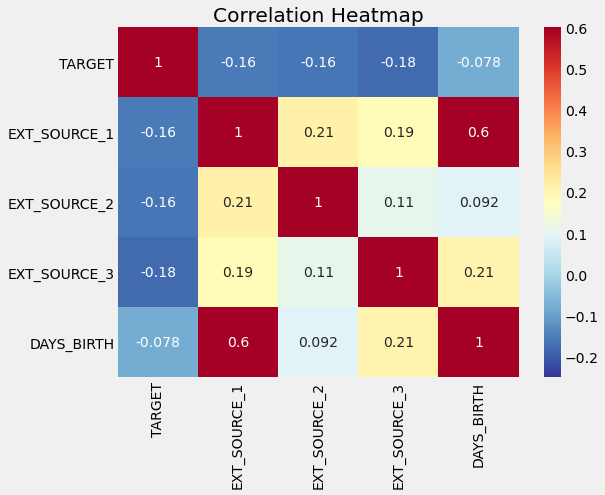

In [201]:
plt.figure(figsize=(8, 6))

# 상관관계 히트맵
sns.heatmap(ext_data_corrs, cmap=plt.cm.RdYlBu_r, vmin=-0.25, annot=True, vmax=0.6)
plt.title('Correlation Heatmap')
plt.show()

세 개의 ```EXT_SOURCE``` 변수들은 모두 타겟과 음의 상관관계를 가지고, 이는 ```EXT_SOURCE``` 값이 증가할수록 고객이 대출금을 더 잘 상환하는 경향이 있다는 것을 나타냅니다. 또한 ```DAYS_BIRTH```가 ```EXT_SOURCE_1```과 양의 상관관계를 가지며, 이것은  이 점수의 요인 중 하나가 고객의 연령일 수 있음을 알 수 있습니다.  

다음으로 target의 값에 따라 다른 색을 주어 이 변수들 각각의 분포를 확인해볼 수 있습니다. 이렇게 하면 해당 변수가 target에 미치는 영향을 시각화할 수 있습니다.

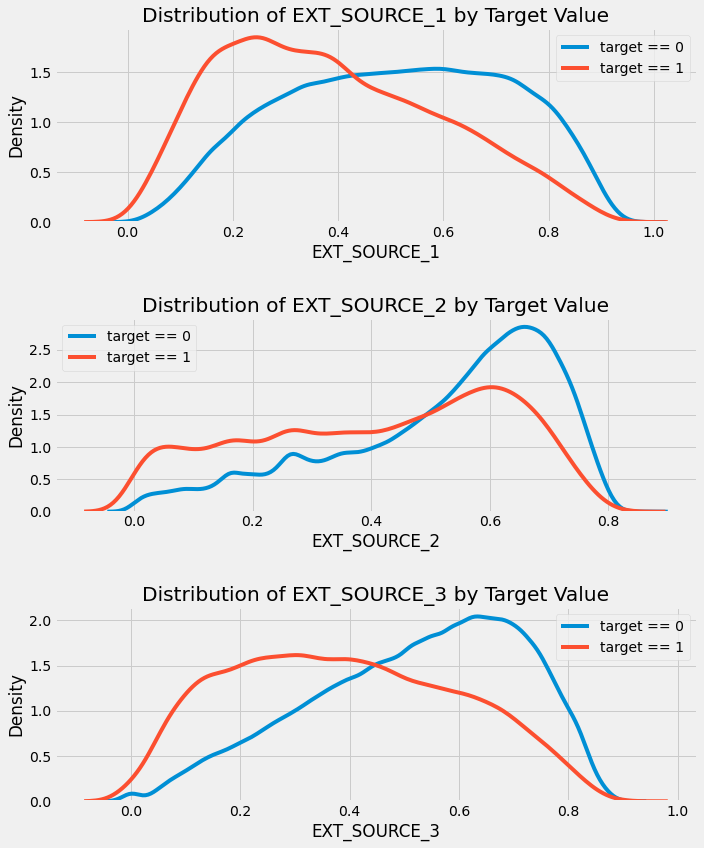

In [202]:
plt.figure(figsize=(10, 12))

for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    plt.subplot(3, 1, i+1)
    sns.kdeplot(app_train.loc[app_train['TARGET']==0, source], label='target == 0')
    sns.kdeplot(app_train.loc[app_train['TARGET']==1, source], label='target == 1')
    
    plt.title('Distribution of %s by Target Value'%source)
    plt.xlabel('%s'%source)
    plt.ylabel('Density')
    plt.legend(loc='best')
plt.tight_layout(h_pad=2.5)

```EXT_SOURCE_3```은 target의 값에 따라 큰 차이를 보입니다. 우리는 이 변수가 신청자의 대출 상환 가능성과 어느정도 관계가 있음을 명확하게 알 수 있습니다. 관계가 강하지는 않지만 이 변수들은 여전히 머신러닝 모델이 신청자가 제때 대출금을 상환할 수 있을지 없을지를 예측하는데 유용할 것입니다.

### Pares Plot
마지막 탐색 플롯으로 ```EXT_SOURCE```와 ```DAYS_BIRTH``` 변수들에 대한 pairs plot을 만들 수 있습니다. [pairs plot](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166)은 단일 변수의 분포뿐만 아니라 여러 쌍의 변수들의 관계를 살펴볼 수 있기 때문에 매우 좋은 탐색 도구입니다. 여기서는 seaborn 시각화 라이브러리의 PairGrid 함수를 사용하여 위쪽 삼각 부분에는 산점도, 대각선에는 히스토그램, 아래 삼각 부분에는2D 커널 밀도 플롯과 상관계수를 나타낼 것입니다.  

이 코드가 잘 이해되지 않는다 해도 괜찮습니다. 파이썬의 플롯은 지나치게 복잡할 수 있으며, 가장 단순한 그래프들 외에는 주로 기존에 구현된 내용을 찾아 코드에 적용합니다.

Text(0.5, 1.05, 'Ext Source and Age Features Pairs Plot')

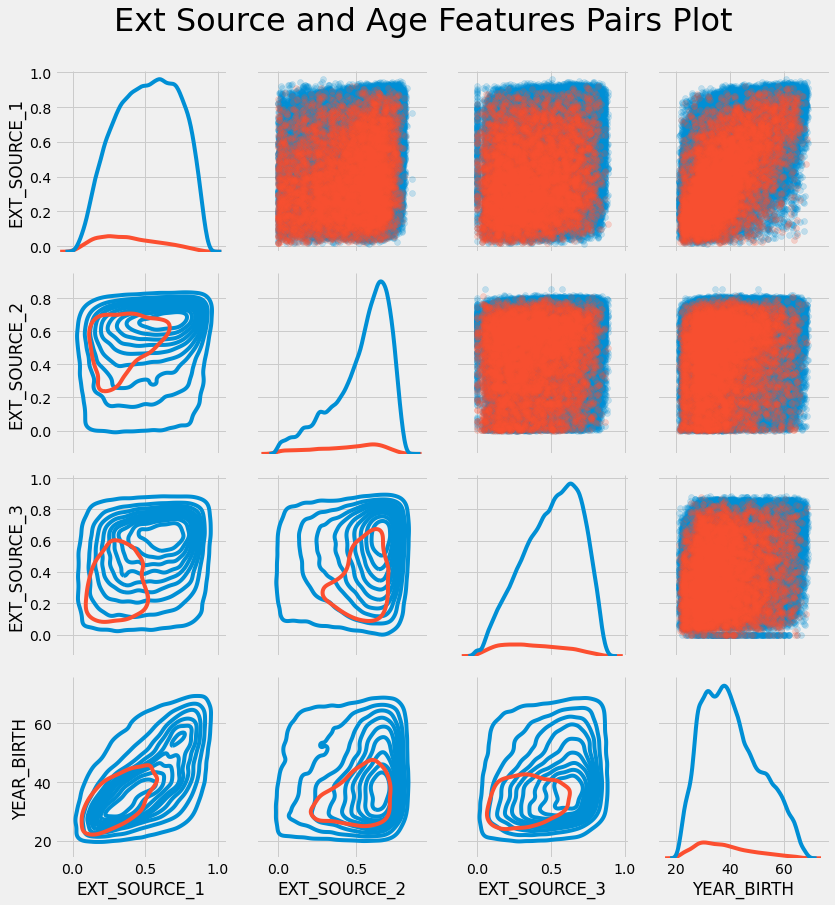

In [203]:
# 플롯으로 나타내기 위해 데이터 복사
plot_data = ext_data.drop(columns='DAYS_BIRTH').copy()

# 고객의 나이 추가
plot_data['YEAR_BIRTH'] = age_data['YEARS_BIRTH']

# 결측값 제거, 첫 100,000행만 추출
plot_data = plot_data.dropna().iloc[:100000, :]

# 두 컬럼 사이의 상관계수를 계산하는 함수
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate('r={:.2f}'.format(r), xy=(.2, .8), xycoords=ax.transAxes, size=20)

# pairgrid 객체 생성
grid = sns.PairGrid(data=plot_data, size=3, diag_sharey=False, hue='TARGET',
                    vars=[x for x in list(plot_data.columns) if x != 'TARGET'])

# 위쪽 산점도
grid.map_upper(plt.scatter, alpha=0.2)

# 대각선 히스토그램
grid.map_diag(sns.kdeplot)

# 아래쪽 밀도 플롯
grid.map_lower(sns.kdeplot, cmap=plt.cm.OrRd_r)

plt.suptitle('Ext Source and Age Features Pairs Plot', size=32, y=1.05)

빨간색은 상환하지 못한 대출들에 대한 것이고, 파란색은 상환한 대출에 대한 것입니다. 데이터 내에서 서로 다른 상관관계를 갖는 것을 볼 수 있습니다. ```EXP_SOURCE_1```과 ```DAYS_BIRTHS``` 사이에는 보통의 양의 상관관계가 보이는데, 이것은 이 변수가 고객의 연령을 고려할 수 있음을 나타냅니다.

## Feature Engineering
Kaggle 대회는 feature engineering으로 이깁니다. 데이터로부터 가장 유용한 변수들을 만들어내는 사람들이 우승할 수 있습니다. (적어도 구조화된 데이터의 경우 우승한 모델들은 모두 gradient boosting에 대한 변형인 경향이 있기 때문에 대부분 사실입니다.) 이것은 머신러닝에서 한 가지 패턴을 보입니다. feature engineering은 모델을 생성하고 하이퍼파라미터 튜닝을 수행하는 것보다 투자 대비 효율이 좋습니다. Andrew Ng은"응용 머신러닝은 기본적으로 feature engineering입니다".라고 즐겨 말합니다.  

올바른 모델과 최적의 설정을 선택하는 것은 중요하지만, 모델은 주어진 데이터만 학습할 수 있습니다. 데이터가 가능한 한 작업과 관련되도록 확실히 하는 것은 데이터 사이언티스트의 일이며 아마 몇 가지 자동화된 툴들이 우리를 도울 것입니다.  

feature engineering은 일반적인 절차를 선호하며, 변수 구성(기존 데이터에서 새로운 변수 추가)과 변수 선택(중요한 변수나 차원 축소 방법을 선택)을 동시에 포함할 수 있습니다. 변수를 생성하고 선택하기 위해 사용할 수 있는 기술들을 매우 다양합니다.  

다른 데이터 소스들을 사용하기 시작하면 매우 많은 feature engineering을 수행해야 하지만, 이 노트북에서는 간단한 두 가지의 변수 구성 방법만은 사용해볼 것입니다.
* Polynomial features
* Domain knowledge features

### Polynomial Features
한 가지 간단한 변수 구성 방법을 polynomial features라고 합니다. 이 방법에서, 변수 간 제곱값뿐만 아니라 상호작용항을 만듭니다. 예를들어, ```EXT_SOURCE_1²```, ```EXT_SOURCE_2²```와 같은 변수들과 ```EXT_SOURCE_1```*```EXT_SOURCE_2```, ```EXT_SOURCE_1```*```EXT_SOURCE_2²```, ```EXT_SOURCE_1²```*```EXT_SOURCE_2²``` 등과 같은 변수들까지 만들 수 있습니다. 각 다중 변수들의 결합은 변수들 간의 상호작용을 발견하기 때문에 상호작용항이라고 부릅니다. 즉, 두 변수간에 target에 대한 강한 영향이 없다 해도 그것들을 결합한 하나의 상호작용항은 target과 관계가 있을 수 있습니다. 상호작용항은 일반적으로 다중 변수들의 영향을 파악하기 위해 통계적인 모델에 자주 사용하지만 머신러닝 모델에는 자주 사용하지 않는 것 같아 보입니다. 그럼에도 불구하고, 우리의 모델이 고객의 대출 상환 여부를 예측하는데 도움이 될지 확인하기 위해 몇 가지 시도해볼 수 있습니다.  

더 자세한 정보를 원한다면 Jake VanderPlas가 쓴 책에서 [polynomial features](https://jakevdp.github.io/PythonDataScienceHandbook/05.04-feature-engineering.html)를 참고할 수 있습니다.  

다음 코드에서는 ```EXT_SOURCE``` 변수들과 ```DAYS_BIRTH``` 변수를 사용하여 다항 식을 만듭니다. Scikit-Learn의 ```PolynomialFeatures``` 클래스가 다항식와 지정한 만큼의 다항변수항을 만들어줍니다. 우리는 결과를 보기 위해 degree를 3으로 설정합니다. (다항식 변수를 만들 때, 너무 높은 degree는 피해야 합니다. degree에 따라 변수의 수가 기하급수적으로 늘어날 수 있으며, 이것은 과적합 문제를 발생시킬 수 있습니다.)

In [204]:
# 다항식 변수를 위한 새로운 데이터프레임 생성
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# 결측값을 다루기 위한 imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns=['TARGET'])

# 결측값 대체
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures

# 다항식 객체 생성
poly_transformer = PolynomialFeatures(degree=3)

In [205]:
# 다항식 변수 학습
poly_transformer.fit(poly_features)

# 변수 변형
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape:', poly_features.shape)

Polynomial Features shape: (307511, 35)


상당한 양의 새로운 변수들이 생성됩니다. ```get_feature_names``` 메소드를 사용하여 변수의 이름을 확인해보겠습니다.

In [206]:
poly_transformer.get_feature_names(input_features=['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2',
 'EXT_SOURCE_1^3',
 'EXT_SOURCE_1^2 EXT_SOURCE_2',
 'EXT_SOURCE_1^2 EXT_SOURCE_3',
 'EXT_SOURCE_1^2 DAYS_BIRTH',
 'EXT_SOURCE_1 EXT_SOURCE_2^2',
 'EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_1 EXT_SOURCE_3^2',
 'EXT_SOURCE_1 EXT_SOURCE_3 DAYS_BIRTH',
 'EXT_SOURCE_1 DAYS_BIRTH^2',
 'EXT_SOURCE_2^3',
 'EXT_SOURCE_2^2 EXT_SOURCE_3',
 'EXT_SOURCE_2^2 DAYS_BIRTH',
 'EXT_SOURCE_2 EXT_SOURCE_3^2',
 'EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH',
 'EXT_SOURCE_2 DAYS_BIRTH^2',
 'EXT_SOURCE_3^3',
 'EXT_SOURCE_3^2 DAYS_BIRTH',
 'EXT_SOURCE_3 DAYS_BIRTH^2',
 'DAYS_BIRTH^3']

degree=3까지 곱해진 개별 변수들과 상호작용항 총 35개입니다. 이제 이 새로운 변수들이 target과 상관관계가 있는지 확인해봅시다.

In [207]:
# 데이터프레임 생성
poly_features = pd.DataFrame(poly_features, columns=poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']))

# target 추가
poly_features['TARGET'] = poly_target

# target과의 상관관계 확인
poly_corrs = poly_features.corr()['TARGET'].sort_values()
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


몇몇 새로운 변수들은 원래 변수들보다 상관관계가 더 큽니다. 머신러닝 모델을 만들 때, 실제로 모델의 학습을 돕는지 판단하기 위해 변수를 추가했다 뺐다 해볼 수 있습니다.  

트레이닝 데이터와 테스트 데이터의 복사본에 이 변수들을 추가하고 변수가 있을 때와 없을 때에 대한 모델을 평가해볼 것입니다. 머신러닝에서 이 접근법이 효과가 있을지 알아볼 유일한 방법은 시험해 보는 것입니다.

In [208]:
# 테스트 변수에 대해서도 데이터프레임 생성
poly_features_test = pd.DataFrame(poly_features_test, columns=poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']))

# 트레이닝 데이터에 다항식 변수 병합
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, on='SK_ID_CURR', how='left')

# 테스트 데이터에 다항식 변수 병합
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features_test, on='SK_ID_CURR', how='left')

# 데이터 정렬
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join='inner', axis=1)

# 새로운 구조 프린트
print('Training data with polynomial features shape:', app_train_poly.shape)
print('Test data with polynomial features shape:', app_test_poly.shape)

Training data with polynomial features shape: (307511, 275)
Test data with polynomial features shape: (48744, 275)


### Domain Knowledge Features
저는 신용 전문가가 아니기 때문에 이 "도메인 지식"이라는 용어가 완전히 옳은 것은 아닐 수 있지만 아마도 "제한된 금융 지식을 적용하려는 시도"라고 부를 수는 있을 것입니다. 이런 마음가짐으로 고객의 대출 상환 여부에 대해 말하는데 중요하다고 생각하는 것을 알 수 있도록 몇 가지 변수들을 만들 수 있습니다. Aguiar의 스크립트를 참고하여 다섯 가지 변수를 만들고자 합니다.  

* ```CREDIT_INCOME_PERCENT```: 고객의 수입에 대한 신용 금액의 비율
* ```ANNUITY_INCOME_PERCENT```: 고객의 수입에 대한 대출 연금의 비율
* ```CREDIT_TERM```: 연금 지불 기간
* ```DAYS_EMPLOYED_PERCENT```: 고객의 연령 대비 고용 일수의 비율  

In [209]:
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT']/app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY']/app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY']/app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED']/app_train_domain['DAYS_BIRTH']

In [210]:
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT']/app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY']/app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY']/app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED']/app_test_domain['DAYS_BIRTH']

#### Visualize New Variables
그래프로 시각화하여 도메인 지식 변수들을 살펴보아야 합니다. ```TARGET```의 값에 따라 색을 준 KDE 플롯을 만들겠습니다.

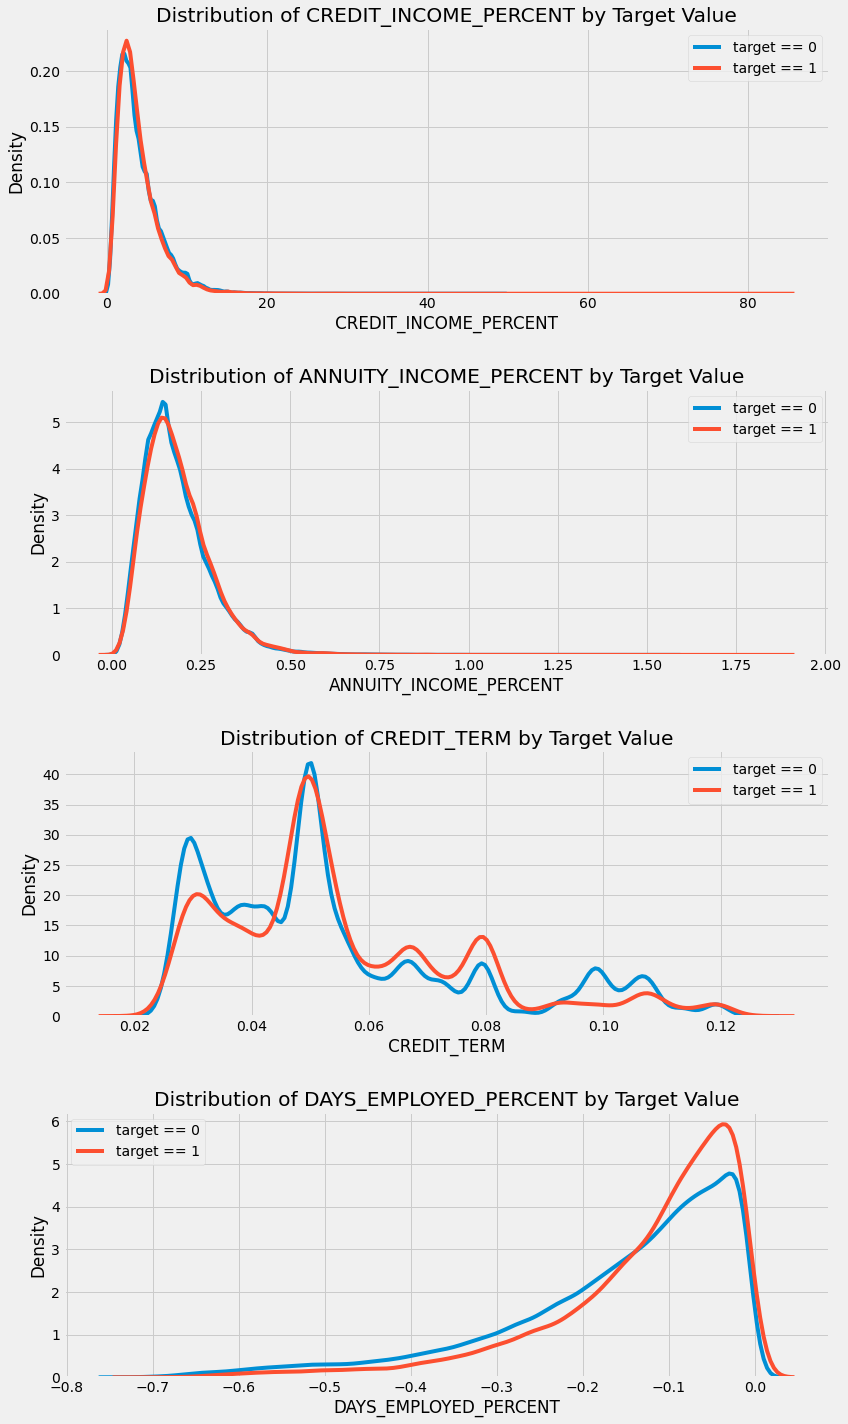

In [211]:
plt.figure(figsize=(12, 20))
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    plt.subplot(4, 1, i+1)
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, feature], label='target == 0')
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, feature], label='target == 1')
    
    plt.title('Distribution of %s by Target Value'%feature)
    plt.xlabel('%s'%feature)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout(h_pad=2.5)
plt.show()

새로운 변수들이 유용한지 미리 말하기는 어렵습니다. 확실한 방법은 직접 확인해보는 것입니다.

## Baseline
단순한 베이스라인의 경우, 테스트 셋의 모든 예제에 대해 같은 값을 예상할 수 있습니다. 우리는 대출을 상환하지 않을 가능성을 예측해야 하기 때문에 완전한 확신이 없으면 테스트 셋의 모든 관측치에 대해 0.5를 추측할 수 있습니다. 이를 통해 대회에서 0.5의 AUC ROC를 얻을 것입니다. (분류에 대한 무작위 추측은 0.5를 얻음)  

우리가 어떤 점수를 받을지 알고 있기 때문에, 단순한 베이스라인 추측을 할 필요가 없습니다. 실제 베이스라인에는 조금 더 정교한 로지스틱 회귀 모형을 사용해봅시다.

### Logistic Regression Implementation
세부 내용을 설명하는 것보다 모델을 구현하는 것에 초점을 둘 것이지만, 머신러닝 알고리즘의 원리에 대해 더 알아보고 싶은 사람들은 [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/)과 [Hands-On Machine Learning with Scikit-Learn and TensorFlow](http://shop.oreilly.com/product/0636920052289.do)를 추천합니다. 두 책 모두 이론과 모델을 만드는 데 필요한 R과 Python 코드에 대해 나와있습니다.  

베이스라인을 얻기 위해 범주형 변수를 인코딩한 후 모든 변수들을 사용할 것입니다. 결측값을 채우고(imputation) 변수들의 범위를 정규화(feature scaling)하는 전처리 작업을 할 예정입니다. 다음 코드는 이러한 전처리 단계를 수행합니다.

In [212]:
from sklearn.preprocessing import MinMaxScaler

# 트레이닝 셋에서 target 제거
if 'TARGET' in app_train:
    train = app_train.drop('TARGET', axis=1)
else:
    train = app_train.copy()

# 변수명
features = list(train.columns)

# 테스트 데이터 복제
test = app_test.copy()

# 결측값을 중앙값으로 대체
imputer = SimpleImputer(strategy='median')

# 0~1 값으로 스케일링
scaler = MinMaxScaler(feature_range=(0, 1))

# 트레이닝 데이터에 적용
imputer.fit(train)

# 트레이닝 데이터와 테스트 데이터 변형
train = imputer.transform(train)
test = imputer.transform(test)

# scaler 적용
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape:', train.shape)
print('Testing data shape:', test.shape)

Training data shape: (307511, 240)
Testing data shape: (48744, 240)


우리의 첫 번째 모델에는 [Scikit-Learn의 ```LogisticRegression```](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)을 사용합니다. 기본 모델 설정으로부터 바꿀 것은 정규화 파라미터인 C의 값을 낮추어 과적합의 양을 조절하는 것입니다. (낮은 값일수록 과적합을 줄입니다.) 이것은 기본값보다 조금 더 나은 결과를 줄 수 있지만, 이후에 모든 모델에 대해 낮은 막대를 설정할 수 있습니다.  

여기서 익숙한 Scikit-Learn 모델링 식을 사용합니다. 먼저 모델을 만든 뒤, ```.fit```을 사용하여 학습시키고, ```.predict_proba```를 사용하여 테스트 데이터에 대해 예측을 합니다. (우리는 0이나 1이 아니라 확률을 계산한다는 것을 명심해야 합니다.)

In [213]:
from sklearn.linear_model import LogisticRegression

# 특정 정규화 파라미터값을 가진 모델 생성
log_reg = LogisticRegression(C=0.0001)

# 트레이닝 데이터로 학습
log_reg.fit(train, train_labels)

LogisticRegression(C=0.0001)

이제 모델이 학습되었으므로 예측을 위해 이것을 사용할 수 있습니다. 우리는 대출을 상환하지 못할 가능성을 예측하고자 하기 때문에 ```predict.proba``` 메소드를 사용합니다. 이것은 m x 2 배열을 리턴하며, 여기서 m은 관측치의 개수입니다. 첫 번째 컬럼은 target = 0의 가능성이고, 두 번째 컬럼은 target = 1의 가능성입니다. 우리는 대출을 상환하지 못할 확률을 원하기 때문에 두 번째 컬럼을 선택할 것입니다.  

다음 코드는 예측 후 올바른 컬럼을 선택하는 내용입니다.

In [214]:
log_reg_pred = log_reg.predict_proba(test)[:, 1]

예측 결과는 ```sample_submission.csv``` 파일의 형식을 가져야 하기 때문에 ```SK_ID_CURR```과 ```TARGET``` 컬럼만 사용할 것입니다.

In [215]:
# 제출 데이터프레임
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred
submit.head()

,SK_ID_CURR,TARGET
0,100001,0.078515
1,100005,0.137926
2,100013,0.082194
3,100028,0.080921
4,100038,0.132618


이 예측 결과들은 대출을 갚지 못할 확률을 0과 1 사이 값으로 나타냅니다. 만약 이 예측 결과를 신청자들을 분류하기 위해 사용하고 싶다면, 대출이 위험하다고 판단하는 확률의 임계값을 조절할 수 있습니다.

In [216]:
submit.to_csv('data/submission_1_log_reg_baseline.csv', index=False)

로지스틱 회귀분석 베이스라인의 제출 결과 점수는 0.67887입니다.

### Improved Model: Random Forest
우리의 베이스라인의 저조한 성능을 이겨내기 위해 알고리즘을 업데이트할 수 있습니다. 동일한 트레이닝 데이터에 랜덤포레스트를 사용하여 성능에 어떤 영향을 미치는지 살펴봅시다. 랜덤포레스트는 트리 수백개를 사용하는 것보다 훨씬 강력합니다. 우리는 랜덤포레스트에서 100개의 트리를 사용할 것입니다.

In [217]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤포레스트 분류기 생성
random_forest = RandomForestClassifier(n_estimators=100, random_state=50, verbose=1, n_jobs=1)

In [218]:
# 트레이닝 데이터 학습
random_forest.fit(train, train_labels)

# 변수 중요도 추출
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature':features, 'importance':feature_importance_values})

# 테스트 데이터로 예측
predictions = random_forest.predict_proba(test)[:, 1]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.3s finished


In [219]:
# 제출 파일 생성
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# 제출물 저장
submit.to_csv('data/submission_1_random_forest_baseline.csv', index=False)

이 모델의 성적은 0.67877입니다.

#### Make Predictions using Engineered Features
다항식 변수와 도메인 지식이 모델을 향상시키는지 확인할 방법은 이 변수들로 모델을 학습시켜 보는 것입니다. 그런 다음 이 feature들이 없는 모델과 비교하여 우리의 feature engineering 효과를 측정할 수 있습니다.

##### Testing Polynomial Features

In [220]:
poly_features_names = list(app_train_poly.columns)

# imputer
imputer = SimpleImputer(strategy='median')

poly_features = imputer.fit_transform(app_train_poly)
poly_features_test = imputer.transform(app_test_poly)

# scaler
scaler = MinMaxScaler(feature_range=(0, 1))

poly_features = scaler.fit_transform(poly_features)
poly_features_test = scaler.transform(poly_features_test)

random_forest_poly = RandomForestClassifier(n_estimators=100, random_state=50, verbose=1, n_jobs=-1)

In [221]:
# 트레이닝 데이터 학습
random_forest_poly.fit(poly_features, train_labels)

# 테스트 데이터로 예측
predictions = random_forest_poly.predict_proba(poly_features_test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   57.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.2min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.6s finished


In [222]:
# 제출파일
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

submit.to_csv('data/submission_1_random_forest_baseline_engineered.csv', index=False)

이 모델의 점수는 0.59684였습니다. 이 경우에는 feature engineering이 도움이 되지 않았습니다.

##### Testing Domain Features
이제 도메인 변수를 테스트해봅시다.

In [223]:
app_train_domain = app_train_domain.drop(columns='TARGET')
domain_features_names = list(app_train_domain.columns)

# imputer
imputer = SimpleImputer(strategy='median')

domain_features = imputer.fit_transform(app_train_domain)
domain_features_test = imputer.transform(app_test_domain)

# scaler
scaler = MinMaxScaler(feature_range=(0, 1))

domain_features = scaler.fit_transform(domain_features)
domain_features_test = scaler.transform(domain_features_test)

random_forest_domain = RandomForestClassifier(n_estimators=100, random_state=50, verbose=1, n_jobs=-1)

# 트레이닝 데이터 학습
random_forest_domain.fit(domain_features, train_labels)

# 변수 중요도 추출
feature_importance_values_domain = random_forest_domain.feature_importances_
feature_importances_domain = pd.DataFrame({'feature':domain_features_names,
                                           'importance':feature_importance_values_domain})

# 테스트 데이터로 예측
predictions = random_forest_domain.predict_proba(domain_features_test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   44.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.7min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.8s finished


In [224]:
# 제출 파일
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions
submit.to_csv('data/submission_1_random_forest_baseline_domain.csv', index=False)

이 모델의 점수는 0.67996입니다.

## Model Interpretation: Feature Importances
어떤 변수가 가장 관계가 있는지 보는 가장 간단한 방법은 랜덤포레스트의 변수 중요도를 살펴보는 것입니다. 탐색적 데이터 분석에서 본 상관관계에 의하면, ```EXT_SOURCE```와 ```DAYS_BIRTH```가 가장 중요한 변수라고 예상합니다. 이후에 차원 축소의 방법으로 이 변수 중요도를 사용할 수 있습니다.

모델에 의해 주어지는 변수 중요도 그림에 대한 함수를 정의합니다. 

In [225]:
# 모델에 의해 주어지는 변수 중요도 플롯 함수
def plot_feature_importances(df):
    '''
    Agrs:
        df: 변수 중요도, feature 컬럼과 importance 컬럼이 있어야 함
    Returns:
        상위 15개의 변수에 대한 중요도를 보여줌
        df: 정규화된 중요도에 따라 내림차순 정렬된 변수 중요도
    '''
    
    # 중요도에 따라 변수 정렬
    df = df.sort_values('importance', ascending=False).reset_index()
    
    # 변수 중요도를 최대 1로 정규화
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    
    # 변수 중요도에 대한 수평 막대 차트 생성
    plt.figure(figsize=(10, 6))
    ax = plt.subplot()
    
    # 인덱스를 역으로 부여
    ax.barh(list(reversed(list(df.index[:15]))),
           df['importance_normalized'].head(15),
           align='center',
           edgecolor='k')
    
    # yticks와 label 설정
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # 플롯 라벨링
    plt.xlabel('Normalized Importance')
    plt.title('Feature Importances')
    plt.show()
    
    return df

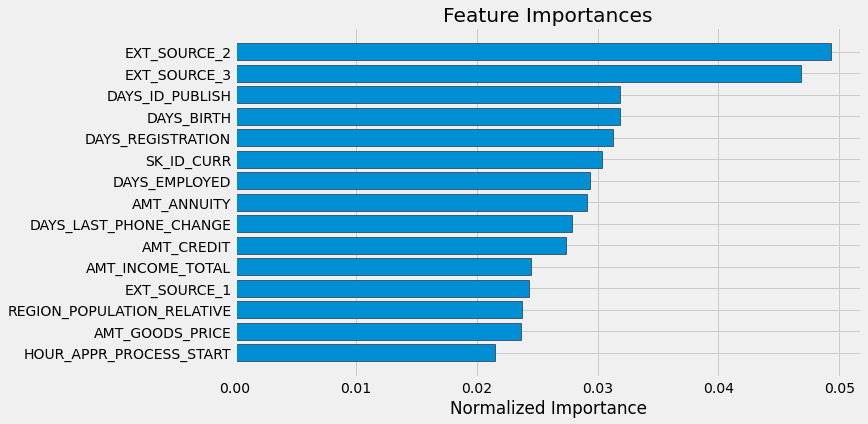

In [226]:
feature_importances_sorted = plot_feature_importances(feature_importances)

예상했던 대로 가장 중요한 변수들은 ```EXT_SOURCE```와 ```DAYS_BIRTH```입니다. 모델에 매우 중요한 변수는 몇 안 되는 것을 볼 수 있으며, 이것은 성능의 저하 없이도 많은 변수들을 제거할 수 있음을 말합니다. 변수 중요도는 모델을 해석하고 차원축소를 하는데 있어서 매우 정교한 방법은 아니지만 예측할 때 모델이 어떤 요소를 고려하는지 이해할 수 있게 합니다.

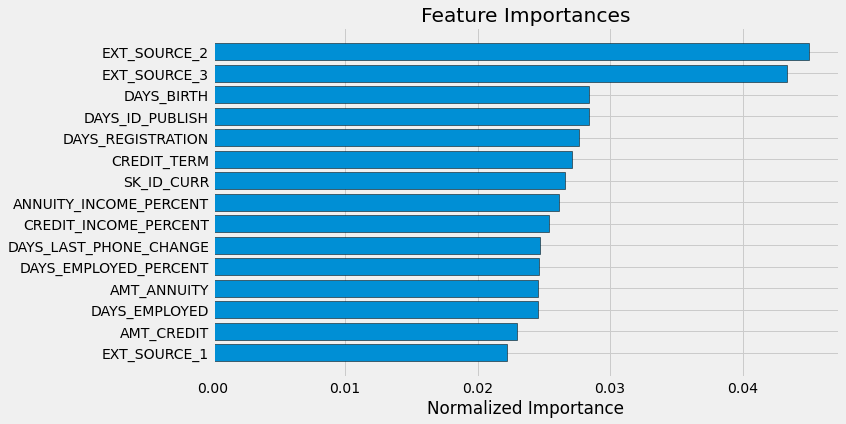

In [227]:
feature_importances_domain_sorted = plot_feature_importances(feature_importances_domain)

우리가 직접 만든 네 개의 변수가 모두 상위 15위 안에 든 것을 볼 수 있습니다. 이로써 우리의 도메인 지식이 적어도 부분적으로는 궤도에 올랐다는 것을 보여줍니다.

## Conclusions
이 노트북을 통해 Kaggle 머신러닝 대회를 어떻게 시작해야 할지 보았습니다. 먼저 데이터, 과제, 제출물을 판단할 메트릭에 대해 이해했습니다. 다음, 모델링에 도움을 줄 수 있는 관계, 트렌드, 이상값을 식별하기 위해 매우 간단한 EDA를 수행했습니다. 그 과정에서 범주형 변수를 인코딩하고, 결측값을 대체하고, 변수들을 스케일링하는 등의 필요한 전처리 과정을 수행했습니다. 또한, 기존 데이터로부터 새로운 변수들을 만들어 우리의 모델에 도움이 되는지 확인했습니다.  

데이터 탐색, 데이터 전처리, feature engineering을 마친 뒤, 개선이 필요한 기본적인 모델을 구현했습니다. 그 다음, 약간 더 정교한 모델을 만들어 첫 번째 점수와 비교했습니다. 또한 engineering을 통해 얻은 변수들을 추가했을 때의 효과를 확인하기 위해 실험을 진행했습니다.  

우리는 [머신러닝 프로젝트의 일반적인 순서](https://towardsdatascience.com/a-complete-machine-learning-walk-through-in-python-part-one-c62152f39420)를 따랐습니다.  

1. 문제와 데이터 이해
2. 데이터 정제 및 포맷팅 (우리는 거의 되어 있었음)
3. 탐색적 데이터 분석
4. 기본 모델
5. 개선된 모델
6. 모델 해석 (조금)  
  
머신러닝 대회는 전형적인 데이터 사이언스의 문제와는 조금 다릅니다. 우리는 오로지 단일 메트릭에서 가장 좋은 성능 달성하는 데만 관심이 있으며, 해석은 그다지 중요하지 않습니다. 그러나 어떻게 모델이 판단을 내리는지 이해하려고 시도함으로써 모델을 향상시키거나 오류를 정정하여 실수를 확인할 수 있습니다. 이후의 노트북에서 우리는 더 다양한 출처의 데이터를 통합하고, 더 복잡한 모델을 구축하며, 우리의 점수를 향상시킬 것입니다.

## + Just for Fun: Light Gradient Boosting Machine
[LightGBM](https://lightgbm.readthedocs.io/en/latest/Quick-Start.html) 라이브러리를 사용하여 [gradient boosting machine](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)을 사용해봅니다. Gradient Boosting Machine은 구조화된 데이터 셋을 학습하는데 가장 우수한 모델입니다. 우리는 이 대회에서 모델을 사용하기 위해 약간 손을 볼 예정입니다. 코드가 위협적이더라도 이것은 완전한 모델을 구축하는데 그저 작은 부분일 뿐이니 걱정하지 않아도 됩니다. 이 코드를 추가한 이유는 단지 이 프로젝트를 위해 무엇을 준비할지 보여주기 위한 것이며, 또한 리더보드의 점수도 조금 올려주기 때문입니다. 

In [275]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import gc

def model(features, test_features, encoding='ohe', n_folds=5):
    '''
    교차 검증을 사용하여 light gradient boosting model을 트레이닝하고 테스트하기 위한 함수
    
    Parameter:
        features: 모델을 학습할 트레이닝 데이터프레임 (TARGET 컬럼 포함되어야 함)
        test_features: 모델이 예측하기 위한 테스트 데이터프레임
        encoding(str, 기본값='ohe'): 범주형 변수를 인코딩하기 위한 방법
            ohe: 원핫인코딩, le: 레이블인코딩
        n_folds(int, 기본값=5): 교차검증에 사용할 폴드의 개수
    
    Return:
       submission: 'SK_ID_CURR'과 모델이 예측한 'TARGET'의 확률값 데이터프레임
       feature_importances: 모델의 변수 중요도 데이터프레임
       valid_metrics: 각 폴드와 전체에 대한 트레이닝 및 검증 메트릭
    '''
    
    # ids 추출
    train_ids = features['SK_ID_CURR']
    test_ids = test_features['SK_ID_CURR']
    
    # 트레이닝 셋으로부터 레이블 추출
    labels = features['TARGET']
    
    # ids와 target 컬럼 제거
    features = features.drop(columns=['SK_ID_CURR', 'TARGET'])
    test_features = test_features.drop(columns=['SK_ID_CURR'])
    
    # 원핫인코딩
    if encoding == 'ohe':
        features = pd.get_dummies(features)
        test_features = pd.get_dummies(test_features)
        
        # 데이터 정렬
        features, test_features = features.align(test_features, join='inner', axis=1)
        
        # 기록할 범주형 인덱스가 없음
        cat_indices = 'auto'
    
    # 레이블인코딩
    elif encoding == 'le':
        
        # 레이블인코더 생성
        label_encoder = LabelEncoder()
        
        # 저장된 범주형 인덱스 목록
        cat_indices = []
        
        # 각 컬럼마다 반복
        for i, col in enumerate(features):
            if features[col].dtype == 'object':
                features[col] = label_encoder.fit_transform(np.array(features[col].astype(str)).reshape((-1,)))
                test_features[col] = label_encoder.transform(np.array(test_features[col].astype(str)).reshape((-1,)))
                
                cat_indices.append(i)
    # 레이블인코딩 체계가 유효하지 않은 경우 오류
    else:
        raise ValueError("Encoding must be either 'ohe' or 'le'")
    
    print('Training Data Shape:', features.shape)
    print('Testing Data Shape:', test_features.shape)
    
    # 변수명 추출
    feature_names = list(features.columns)
    
    # np.array 형태로 변환
    features = np.array(features)
    test_features = np.array(test_features)
    
    # k겹 객체 생성
    k_fold = KFold(n_splits=n_folds, shuffle=True, random_state=50)
    
    # 변수 중요도를 위한 빈 배열
    feature_importance_values = np.zeros(len(feature_names))
    
    # 테스트 예측을 위한 빈 배열
    test_predictions = np.zeros(test_features.shape[0])
    
    # 나머지 검증 예측을 위한 빈 배열
    out_of_fold = np.zeros(features.shape[0])
    
    # 검증 및 트레이닝 점수 기록용 리스트
    valid_scores = []
    train_scores = []
    
    # 각 폴드마다 반복
    for train_indices, valid_indices in k_fold.split(features):
        
        # 폴드를 위한 트레이닝 데이터
        train_features, train_labels = features[train_indices], labels[train_indices]
        # 폴드를 위한 검증 데이터
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]
        
        # 모델 생성
        model = lgb.LGBMClassifier(n_estimators=10000, objective='binary',
                                   class_weight='balanced', learning_rate=0.05,
                                   reg_alpha=0.1, reg_lambda=0.1,
                                   subsample=0.8, n_jobs=-1, random_state=50)
        
        # 모델 학습
        model.fit(train_features, train_labels, eval_metric='auc',
                  eval_set=[(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names=['valid', 'train'],
                  categorical_feature=cat_indices,
                  early_stopping_rounds=100, verbose=200)
        
        # best iteration 기록
        best_iteration = model.best_iteration_
        
        # 변수 중요도 기록
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
        # 예측
        test_predictions += model.predict_proba(test_features, num_iteration=best_iteration)[:, 1] / k_fold.n_splits
        
        # 나머지 예측 기록
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration=best_iteration)[:, 1]
        
        # 최고 점수 기록
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
        
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        # 메모리 정리
        gc.enable()
        del model, train_features, valid_features
        gc.collect()
        
    # 제출용 데이터프레임
    submission = pd.DataFrame({'SK_ID_CURR':test_ids, 'TARGET':test_predictions})
    
    # 변수 중요도 데이터프레임
    feature_importances = pd.DataFrame({'feature':feature_names, 'importance':feature_importance_values})
    
    # 전체 검증 점수
    valid_auc = roc_auc_score(labels, out_of_fold)
    
    # 메트릭에 전체 점수 추가
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))
    
    # 검증 점수에 대한 데이터프레임 생성에 필요
    fold_names = list(range(n_folds))
    fold_names.append('overall')
    
    # 검증 점수 데이터프레임
    metrics = pd.DataFrame({'fold':fold_names, 'train':train_scores, 'valid':valid_scores})
    
    return submission, feature_importances, metrics

In [276]:
submission, fi, metrics = model(app_train, app_test)
print('Baseline metrics')
print(metrics)

Training Data Shape: (307511, 239)
Testing Data Shape: (48744, 239)
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.798723	train's binary_logloss: 0.547797	valid's auc: 0.755039	valid's binary_logloss: 0.563266
[400]	train's auc: 0.82838	train's binary_logloss: 0.518334	valid's auc: 0.755107	valid's binary_logloss: 0.545575
Early stopping, best iteration is:
[315]	train's auc: 0.816657	train's binary_logloss: 0.530116	valid's auc: 0.755215	valid's binary_logloss: 0.552627
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.798409	train's binary_logloss: 0.548179	valid's auc: 0.758332	valid's binary_logloss: 0.563587
[400]	train's auc: 0.828244	train's binary_logloss: 0.518308	valid's auc: 0.758563	valid's binary_logloss: 0.545588
Early stopping, best iteration is:
[317]	train's auc: 0.8169	train's binary_logloss: 0.529878	valid's auc: 0.758754	valid's binary_logloss: 0.552413
Training until validation scores don't improv

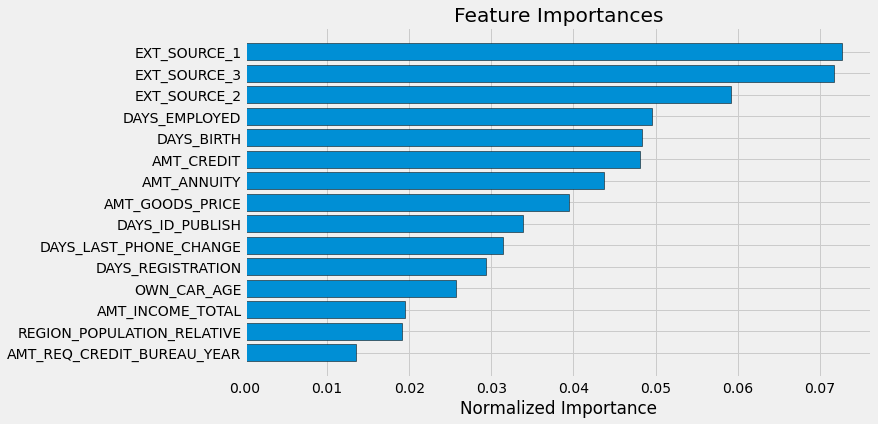

In [277]:
fi_sorted = plot_feature_importances(fi)

In [279]:
submission.to_csv('data/submission_1_baseline_lgb.csv', index=False)

이 모델의 점수는 리더보드에서 0.73469입니다.

In [280]:
app_train_domain['TARGET'] = train_labels

submission_domain, fi_domain, metrics_domain = model(app_train_domain, app_test_domain)
print('Baseline with domain knowledge features metrics')
print(metrics_domain)

Training Data Shape: (307511, 243)
Testing Data Shape: (48744, 243)
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.804779	train's binary_logloss: 0.541283	valid's auc: 0.762511	valid's binary_logloss: 0.557227
Early stopping, best iteration is:
[268]	train's auc: 0.815523	train's binary_logloss: 0.530413	valid's auc: 0.763069	valid's binary_logloss: 0.550276
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.804016	train's binary_logloss: 0.542318	valid's auc: 0.765768	valid's binary_logloss: 0.557819
Early stopping, best iteration is:
[218]	train's auc: 0.807075	train's binary_logloss: 0.539112	valid's auc: 0.766062	valid's binary_logloss: 0.555952
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.8038	train's binary_logloss: 0.542856	valid's auc: 0.7703	valid's binary_logloss: 0.557925
[400]	train's auc: 0.834559	train's binary_logloss: 0.511454	valid's auc: 0.770511	valid's binary_lo

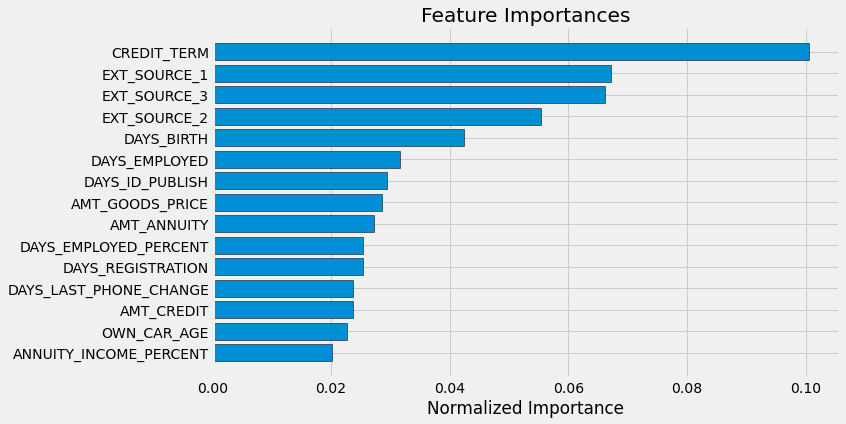

In [281]:
fi_sorted = plot_feature_importances(fi_domain)

In [282]:
submission_domain.to_csv('data/submission_1_baseline_lgb_domain_features.csv', index=False)

이 모델의 점수는 0.75440입니다.